# Pénzérme felismerés

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

A vizsgálni kívánt fotóbeolvasása és átméretezése:


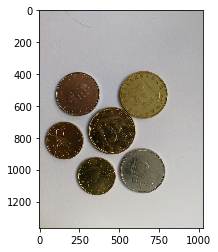

In [2]:
filename = "11.jpg"
img = cv2.imread(os.path.join("proba_kepek", filename))

d = 1024 / img.shape[1]
dim = (1024, int(img.shape[0] * d))
resized = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
plt.imshow(resized[:,:,::-1])
plt.show()

A vizsgált RGB kép szürkeárnyalatos képpé került konvertálásra.

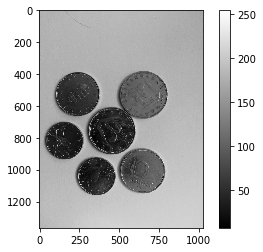

In [3]:
img_gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap = "gray")
plt.colorbar()
plt.show()

Gaussian szűrő alkalmazása a fotón.

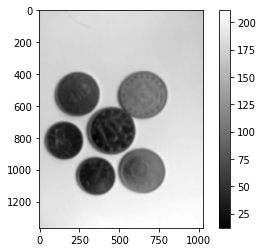

In [4]:
blur_img = cv2.GaussianBlur(img_gray,(35,35), 0)
plt.imshow(blur_img, cmap = "gray")
plt.colorbar()
plt.show()

In [5]:
circles = cv2.HoughCircles(blur_img,cv2.HOUGH_GRADIENT,1,120,param1=40,param2=35, minRadius=50, maxRadius=160)
print("A megtalál körök egy tömben kerültek eltárolásra:",'\n')
print(circles)

print('\n',"A feldolgozott képen", circles.shape[1], "kör került feltalálásra.")
   


A megtalál körök egy tömben kerültek eltárolásra: 

[[[ 240.5  525.5  138.2]
  [ 452.5  755.5  148.4]
  [ 638.5 1013.5  148.8]
  [ 654.5  530.5  148.2]
  [ 351.5 1041.5  122.8]
  [ 157.5  817.5  118.6]]]

 A feldolgozott képen 6 kör került feltalálásra.


A feltalált érméket ábrázoló részek kivágása, azoknak a szín összetevőinek vizsgálata, valamint fényességük korrigálása.

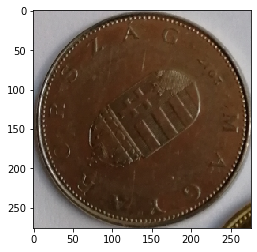

[59.66271529 75.30728838 96.37301775]
Az érme szélessége: 138


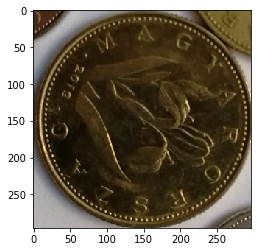

[40.74691837 62.77032734 75.66547206]
Az érme szélessége: 148


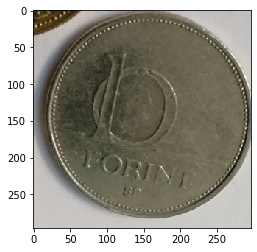

[101.6732332  116.14477949 119.84074827]
Az érme szélessége: 148


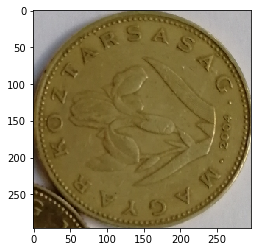

[ 66.50551269 109.84155862 125.375     ]
Az érme szélessége: 148


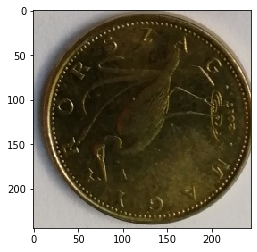

[56.6767502  78.31710226 86.76639344]
Az érme szélessége: 122


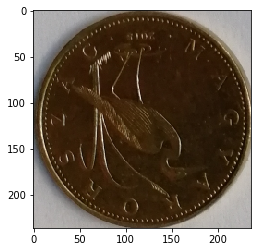

[46.97400172 64.6927607  81.88654481]
Az érme szélessége: 118


In [6]:
circles_color = []
for i in circles[0,:]:
    x=int(i[0])
    y=int(i[1])
    d=int(i[2])
    roi = resized[y - d:y + d, x - d:x + d]
   
    hsv = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
    avg_hsv_per_row = np.average(hsv, axis=0)
    avg_hsv = np.average(avg_hsv_per_row, axis=0)

    
    if (avg_hsv[2] > 140):
        hsv[:,:,2] -= 40
        img2 = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
        plt.imshow(img2[:,:,::-1])
        plt.show()
        avg_color_per_row = np.average(img2, axis=0)
        avg_color = np.average(avg_color_per_row, axis=0)
        print(avg_color)
        circles_color.append(avg_color)
        print("Az érme szélessége: " + str(d))
    
    else:
        plt.imshow(roi[:,:,::-1])
        plt.show()
        avg_color_per_row = np.average(roi, axis=0)
        avg_color = np.average(avg_color_per_row, axis=0)
        print(avg_color)
        circles_color.append(avg_color)
        print("Az érme szélessége: " + str(d))

A megtalál körök kirajzolása.

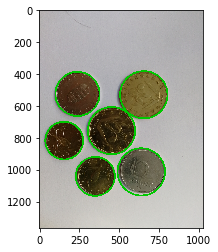

In [7]:
resized_withcircle = resized.copy()

for i in circles[0,:]:
    cv2.circle(resized_withcircle,(i[0],i[1]),i[2],(0,200,0),10)

plt.imshow(resized_withcircle[:,:,::-1])
plt.show()

A megtalált érmék érékeinek meghatározása, és az értékek összegének kiszámolása a feltalált körök átmérőjének és szín összetevőjének felhasználásával.

In [8]:
found_coin_values = 0
found_coins = [0,0,0,0,0,0]
coins = [5,10,20,50,100,200]
z = 0 
b = 80
for i in circles[0,:]:
    if (i[2] <= 130 and circles_color[z][0] < b):
        found_coin_values += 5
        found_coins[0] += 1
    elif (i[2] > 130 and i[2] <=140 and circles_color[z][0] < b):
        found_coin_values += 100
        found_coins[4] += 1
    elif (i[2] > 144 and i[2] <=158 and circles_color[z][0] < b):
        found_coin_values += 20
        found_coins[2] += 1
    elif (i[2] > 158 and circles_color[z][0] < b):
        found_coin_values += 200
        found_coins[5] += 1
    elif (i[2] > 135 and i[2] <=150):
        found_coin_values += 10
        found_coins[1] += 1
    elif (i[2] > 150 and i[2] <=160):
        found_coin_values += 50
        found_coins[3] += 1
            
    z = z + 1

Eredmény összesítés egy kép vonatkozásában.

In [9]:
print("A ", filename, " fájlban a feltalált érmék darab száma: ", circles.shape[1], 
      "a feltalált érmék kiszámított összértéke pedig", found_coin_values, ".")
print ("A feltalált érmék:")
z = 0
for i in found_coins:
    print( i, " db.", coins[z], "Ft-os")
    z = z + 1

A  11.jpg  fájlban a feltalált érmék darab száma:  6 a feltalált érmék kiszámított összértéke pedig 160 .
A feltalált érmék:
2  db. 5 Ft-os
1  db. 10 Ft-os
2  db. 20 Ft-os
0  db. 50 Ft-os
1  db. 100 Ft-os
0  db. 200 Ft-os
